<a href="https://colab.research.google.com/github/jethompson023/CS-491/blob/main/Final_CS491.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use NumPy to create a 1000x1000 array. The first row should contain random real numbers between 0 (inclusive) and 10 (exclusive). Each of the next rows should contains the numbers of the first row multiplied by a random real number between 0 (inclusive) and 10 (exclusive).

In [ ]:
import numpy as np 
import random
from random import randint

a = [np.random.randint(10, size= 1000)] * 1000

def showArray(row):
  return row*random.randint(0,10)

a[1:] = np.apply_along_axis(showArray, 0, a[1:])
a

2[3]. Write code to compute the sum of the numbers on the top right to the bottom left diagonal of the NumPy array of Question 1.

In [ ]:
sum = np.diag(np.fliplr(a)).sum()
sum

24708

3[8]. Consider storing information about a movie theater. The Movie data frame contains information about the name of the movie (unique identifier) and the year the movie was produced.  The Room data frame stores the projection room number (unique identifier) and the capacity of the room. The Projection data frame stores the projection id (unique identifier), the date of the projection, the time of the projection, the room number, and the movie name. Lastly, the Ticket data frame stores the projection id and ticket price. As you can imagine, there can be multiple ticket sales for the same projection and the ticket prices can be different. Create the four data frames and populate them with sample data.

For the next questions, write Python code to answer them.  You cannot assume anything about the content of the data frames. That is, your code should work regardless of what is in the data frames. If there are ties, please return all rows. For example, if the question asks for the movie that has sold the most tickets, please return all such movies if there is a tie. Your code should only return the data that the question requires.

In [ ]:
import numpy as np 
import pandas as pd

movies_showings =({'flim_name': ['Iron Man', 'Captain America', 'Thor', 'Spiderman: No Way Home'],
                   'year': [2008, 2011, 2013, 2021]}) 
show_movie = pd.DataFrame(movies_showings)

showing_rooms =({'room_number': [1, 2, 3, 4],
                   'max_capacity': [20, 50, 35, 55]})
show_room = pd.DataFrame(showing_rooms)

movie_projectors =({'projector_number': [12, 42, 63, 24],
                   'show_date': ['12/6/2021', '2/4/2021', '11/12/2021', '12/6/2021'],
                    'room_number': [3, 4, 2, 1],
                    'flim_name': ['Iron Man', 'Captain America', 'Thor', 'Spiderman: No Way Home']})
projectors = pd.DataFrame(movie_projectors)

show_tickets =({'projector_number': [12, 42, 63, 24],
                   'ticket_price': [15.00, 12.00, 12.00, 10.00]})
tickets = pd.DataFrame(show_tickets)

4[4]. Which projection room has the highest average occupancy rate, where the occupancy rate for a projection is computed as the number of tickets sold divided by the capacity of the room? When computing the average occupancy rate, please divide the total number of tickets sold (for all projections in the room) by the max number of tickets that could have been sold. That is, please do not take the average for each projection and then take the average of these numbers. Return the room number for all such rooms. 


In [ ]:
#Join the two Dataframe for Comparision
new_frame = show_room.join(projectors.set_index('room_number'), on= 'room_number')
new_frame = new_frame.join(tickets.set_index('projector_number'), on='projector_number')[['room_number', 'max_capacity']]

#Count the Number of Tickets Sold
total_tickets = new_frame['room_number'].value_counts().to_frame().reset_index()

#Create New Column for the Number of Tickets sold
total_tickets.columns = ['room_number', 'totals']
new_frame = new_frame.join(total_tickets.set_index('room_number'), on= 'room_number').drop_duplicates()

#Find the Average
new_frame['visitors'] = new_frame['totals'] / new_frame['max_capacity']
new_frame.iloc[new_frame['visitors'].argmax()]['room_number']

1.0

5[4]. Which movie has the brought the most revenue from ticket sales? Print the names of all such movies.

In [ ]:
max_rev = show_movie.join(projectors.set_index('flim_name'), on= 'flim_name')
max_rev = max_rev.join(tickets.groupby('projector_number'), on= 'projector_number')
max_rev.iloc[max_rev['ticket_price'].argmax()]['flim_name']

ValueError: ignored

6[4]. On which date(s) did the movie theater made the highest revenue from ticket sales? Return all such dates.

In [ ]:
high_rev = projectors.join(tickets.groupby('projector_number').sum(), on='projector_number')
high_rev = high_rev.groupby('show_date').sum().reset_index()
high_rev.iloc[high_rev['ticket_price'].argmax()]['show_date']

7[4]. What is the name of the oldest movie(s) that has been shown in the movie theater? 

In [ ]:
show_movie.iloc[show_movie['year'].argmin()]['flim_name']

8[4]. Which movie(s) has the highest average ticket price? Return the name(s) of all such movies.

In [ ]:
high_avg = show_movie.join(projectors.set_index('flim_name'), on='flim_name')
high_avg = high_avg.join(tickets.groupby('projector_number').mean(), on='projector_number')
high_avg.iloc[high_rev['ticket_price'].argmax()]['flim_name']

9[6]. Show an example XML file that contains the same information as the sample data that you created in Question 3. 


10[2]. Write an XPath query that finds the dates of the “James Bond” movie projections.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
(/content/drive/GoogleDrive/My Drive/Spring 2021/CS-491[text()=”James Bond”]/../@date)

SyntaxError: ignored

11[4]. Consider again the data from Question 3. Write a program that shows a scatter plot of the ticket revenue per day. The X coordinate is the date and the Y coordinate is the total revenue from ticket sales for that day. Your code should not depend on the actual content of the data frames. That is, it should work regardless of the content of the data frames. 

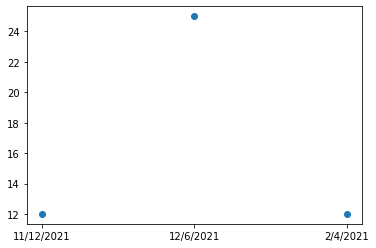

In [ ]:
tick_rev = projectors.join(tickets.groupby('projector_number').sum(), on='projector_number')
tick_rev = tick_rev.groupby('show_date').sum().reset_index()

x = tick_rev['show_date'].tolist()
y = tick_rev['ticket_price'].tolist()
plt.scatter(x,y)
plt.show()

12[2]. Consider the following table

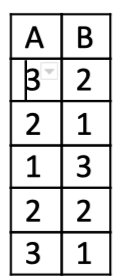


Show graphically the result of applying two steps of the k-Means Clustering algorithm on the data. Use k =3. It is up to you how to choose the initial centroids. 

In [ ]:
#Generate the data from the table given 
import pandas as pd

d1 = pd.DataFrame(
      {'A': ['3', '2', '1', '2', '3'], 
      'B': ['2', '1', '3', '2', '1']})
df = pd.DataFrame(d1)

In [ ]:
#Implement k-means clustering and sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn_pandas
from sklearn.cluster import KMeans

#Setup the Clustering from the dataframe
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

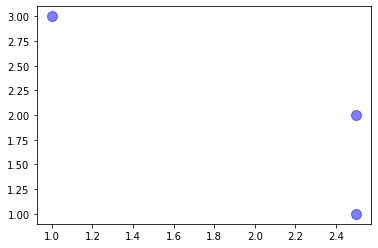

In [ ]:
#Plot the results from the clustering
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='blue', s=100, alpha=0.5)